In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Datasets/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
X= df.drop(columns=['RowNumber' ,'CustomerId', 'Surname', 'Exited'], axis=1)

In [ ]:
Y= df['Exited']

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
X['Gender']=X['Gender'].replace({'Female':1,'Male':0})

In [ ]:
geography= pd.get_dummies(X['Geography'])

In [ ]:
X= pd.concat([X,geography], axis=1)

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,France,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [ ]:
X=X.drop('Geography',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.2, random_state= 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [ ]:
Xtrain= sc.fit_transform(Xtrain)
Xtest= sc.fit_transform(Xtest)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
Xtrain.shape

(8000, 12)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(12,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(Xtrain, Ytrain, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5279 - accuracy: 0.7835
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8087
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8232
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8338
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8413
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8493
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3552 - accuracy: 0.8505
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3504 - accuracy: 0.8546
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8549
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8583

In [ ]:
print('Accuracy : ',model.evaluate(Xtest,Ytest)[1] *100)

63/63 [==============================] - 0s 1ms/step - loss: 0.3506 - accuracy: 0.8535
Accuracy :  85.35000085830688


In [ ]:
pred=model.predict(Xtest)
pred

array([[0.36516583],
       [0.2784093 ],
       [0.11118883],
       ...,
       [0.11877155],
       [0.21628588],
       [0.10746333]], dtype=float32)

In [ ]:
Ypred = []
for i in pred:
  if i > 0.5:
    Ypred.append(1)
  else:
    Ypred.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report:")
print(classification_report(Ytest,Ypred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1595
           1       0.67      0.54      0.60       405

    accuracy                           0.85      2000
   macro avg       0.78      0.74      0.75      2000
weighted avg       0.84      0.85      0.85      2000



[Text(69.0, 0.5, 'True'),
 Text(0.5, 69.0, 'Predicted'),
 Text(0.5, 1.0, 'Confusion Matrix')]

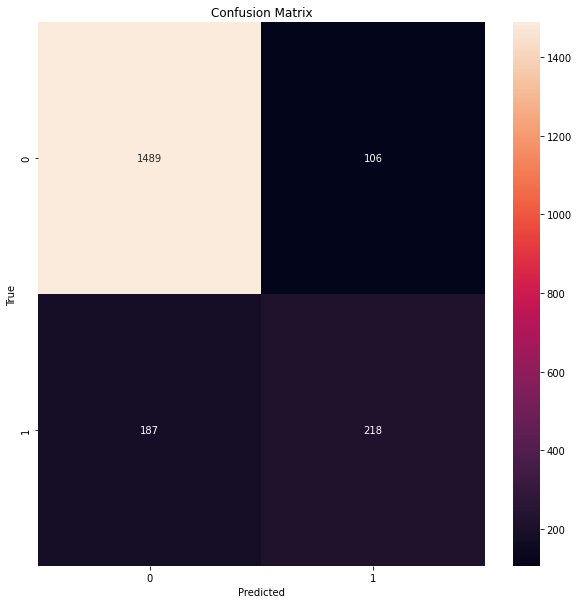

In [ ]:
plt.figure(figsize=(10,10))
conf_mat=confusion_matrix(Ytest,Ypred)
sns.heatmap(conf_mat,annot=True,fmt='d').set(title='Confusion Matrix',xlabel='Predicted',ylabel='True')